<a href="https://colab.research.google.com/github/fact-h/1D-CNN-flood/blob/main/1D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rapid forecasting of compound flooding for a coastal area based on data-driven approach
- Target: Predicting the maximum water depth of the whole study area based on the sequences of rainfall and tide level.
- ML model: [LightGBM](https://lightgbm.readthedocs.io/en/latest/), 1D CNN
- Inputs: Ten features of rainfall and tide level and one feature about the location of flooded sites.
- Output: Maximum water depth



## Module input

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

from sklearn.neural_network import MLPRegressor

%matplotlib inline

try:
    from ipywidgets import interact, SelectMultiple
    INTERACTIVE = True
except ImportError:
    INTERACTIVE = False

## Load the csv files

- `dataset\X.csv`
- `dataset\partDepth.csv`

In [ ]:
df_X_raw = pd.read_csv('/content/X.csv')
df_d = pd.read_csv('/content/partDepth.csv')

df_depth = df_d.transpose()
df_depth = df_depth.reset_index(drop=True)

df_depth

,0,1,2,3,4,5,6,7,8,9,...,13304,13305,13306,13307,13308,13309,13310,13311,13312,13313
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.44,0.00,0.00,0.00,0.00,0.00,0.00
1,0.09,0.21,0.16,0.14,0.00,0.00,0.00,0.13,0.16,0.00,...,0.03,0.00,0.00,0.45,0.13,0.00,0.17,0.00,0.00,0.00
2,0.18,0.31,0.26,0.24,0.00,0.00,0.00,0.23,0.26,0.00,...,0.08,0.00,0.01,0.46,0.45,0.38,0.48,0.08,0.00,0.00
3,0.32,0.44,0.39,0.37,0.00,0.00,0.06,0.36,0.39,0.34,...,0.14,0.00,0.04,0.47,0.60,0.53,0.64,0.23,0.00,0.00
4,0.46,0.58,0.53,0.51,0.00,0.00,0.20,0.50,0.54,0.48,...,0.20,0.00,0.09,0.48,0.69,0.62,0.73,0.32,0.00,0.00
5,0.60,0.72,0.67,0.65,0.00,0.13,0.35,0.64,0.67,0.63,...,0.28,0.03,0.16,0.51,0.79,0.72,0.83,0.42,0.00,0.00
6,0.70,0.82,0.77,0.75,0.03,0.23,0.45,0.74,0.77,0.73,...,0.35,0.08,0.22,0.56,0.86,0.79,0.90,0.49,0.00,0.00
7,0.06,0.18,0.13,0.11,0.00,0.00,0.00,0.10,0.14,0.00,...,0.08,0.03,0.03,0.51,0.00,0.00,0.00,0.00,0.00,0.00
8,0.12,0.24,0.19,0.17,0.00,0.00,0.00,0.16,0.19,0.00,...,0.10,0.03,0.05,0.51,0.16,0.00,0.19,0.00,0.00,0.00
9,0.20,0.32,0.27,0.25,0.00,0.00,0.00,0.24,0.28,0.03,...,0.14,0.04,0.07,0.52,0.46,0.38,0.49,0.09,0.00,0.00


## Extract features
- Features related to Rainfall: **Cumulative rainfall, Rainfall return period, Rainfall peak, Maximum 2h rainfall, Maximum 3h rainfall, Cumulative rainfall before peak**
- Features related to Tide level: **Maximum tide level, Tide level return period, Average tide level, Maximum 5h average tide level**

In [ ]:
# @title Create the DataFrame: `rain_feature_df` and `tide_feature_df` { display-mode: "form" }

# Create a Rainfall DataFrame
rain_feature_df = pd.DataFrame()

rain_feature_df['CumRainfall'] = df_X_raw.iloc[:,2:9].sum()
rain_feature_df['RainRP'] = [5,10,20,35,50,75,100]
rain_feature_df['RainfallPeak'] = df_X_raw.iloc[:,2:9].max()
rain_feature_df['MaxRainfall2h'] = np.add(df_X_raw.iloc[0:-2,2:9], df_X_raw.iloc[1:-1,2:9]).max()
rain_feature_df['MaxRainfall3h'] = np.add(np.add(df_X_raw.iloc[0:-3,2:9],df_X_raw.iloc[1:-2,2:9]),df_X_raw.iloc[2:-1,2:9]).max()
peak_index = df_X_raw[df_X_raw.iloc[:,2]==rain_feature_df['RainfallPeak'][0]].index.tolist()[0]
rain_feature_df['CumRainfallBeforePeak'] = df_X_raw.iloc[0:peak_index,2:9].sum()

# Create a Tide level DataFrame
tide_feature_df = pd.DataFrame()

tide_feature_df['MaxTide'] = df_X_raw.iloc[:,9:].max()
tide_feature_df['TideRP'] = [5,10,20,35,50,75,100]
tide_feature_df['MeanTide'] = df_X_raw.iloc[:,9:].mean()
tide_feature_df['MaxTide5h'] = np.add(
    np.add(np.add(
        np.add(df_X_raw.iloc[0:-5,9:],df_X_raw.iloc[1:-4,9:]),
        df_X_raw.iloc[2:-3,9:]),df_X_raw.iloc[3:-2,9:]),
        df_X_raw.iloc[4:-1,9:]).max()/5

<ipython-input-4-2d547023df7e>:15: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  rain_feature_df['MaxRainfall2h'] = np.add(df_X_raw.iloc[0:-2,2:9], df_X_raw.iloc[1:-1,2:9]).max()
<ipython-input-4-2d547023df7e>:18: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy a

In [ ]:
rain_feature_df

,CumRainfall,RainRP,RainfallPeak,MaxRainfall2h,MaxRainfall3h,CumRainfallBeforePeak
rain5,199.101882,5,56.394737,86.377019,99.455229,35.806351
rain10,242.672478,10,68.735917,105.279393,121.219581,43.642058
rain20,288.152174,20,81.617842,125.009998,143.937566,51.821097
rain35,327.041437,35,92.633056,141.881454,163.363503,58.814916
rain50,352.897968,50,99.956805,153.098877,176.279339,63.464938
rain75,383.665366,75,108.671536,166.446798,191.648247,68.998126
rain100,406.171863,100,115.046402,176.210865,202.890676,73.045680


In [ ]:
tide_feature_df

,MaxTide,TideRP,MeanTide,MaxTide5h
tide5,2.898900,5,1.872049,2.579491
tide10,3.159600,10,2.040403,2.811467
tide20,3.400900,20,2.196230,3.026179
tide35,3.585497,35,2.315439,3.190437
tide50,3.701200,50,2.390157,3.293392
tide75,3.827370,75,2.471635,3.405660
tide100,3.917500,100,2.529839,3.485859


## Combine the data

### Combine the maximum water depth and features of rainfall and tide level to form 49 samples


In [ ]:
# reset the index
rain_feature_df = rain_feature_df.reset_index(drop=True)
tide_feature_df = tide_feature_df.reset_index(drop=True)

rain_repeat_df = pd.DataFrame(np.repeat(rain_feature_df.values,tide_feature_df.shape[0],axis=0))
rain_repeat_df.columns = rain_feature_df.columns

tide_concat_df = pd.concat([tide_feature_df, tide_feature_df, tide_feature_df, tide_feature_df, tide_feature_df, tide_feature_df, tide_feature_df]).reset_index(drop=True)

# combine rainfall and tide level
df_X = rain_repeat_df.join(tide_concat_df)

# add the outputs
df_data = df_X.join(df_depth)

# the data set
df_data

,CumRainfall,RainRP,RainfallPeak,MaxRainfall2h,MaxRainfall3h,CumRainfallBeforePeak,MaxTide,TideRP,MeanTide,MaxTide5h,...,13304,13305,13306,13307,13308,13309,13310,13311,13312,13313
0,199.101882,5.0,56.394737,86.377019,99.455229,35.806351,2.898900,5,1.872049,2.579491,...,0.01,0.00,0.00,0.44,0.00,0.00,0.00,0.00,0.00,0.00
1,199.101882,5.0,56.394737,86.377019,99.455229,35.806351,3.159600,10,2.040403,2.811467,...,0.03,0.00,0.00,0.45,0.13,0.00,0.17,0.00,0.00,0.00
2,199.101882,5.0,56.394737,86.377019,99.455229,35.806351,3.400900,20,2.196230,3.026179,...,0.08,0.00,0.01,0.46,0.45,0.38,0.48,0.08,0.00,0.00
3,199.101882,5.0,56.394737,86.377019,99.455229,35.806351,3.585497,35,2.315439,3.190437,...,0.14,0.00,0.04,0.47,0.60,0.53,0.64,0.23,0.00,0.00
4,199.101882,5.0,56.394737,86.377019,99.455229,35.806351,3.701200,50,2.390157,3.293392,...,0.20,0.00,0.09,0.48,0.69,0.62,0.73,0.32,0.00,0.00
5,199.101882,5.0,56.394737,86.377019,99.455229,35.806351,3.827370,75,2.471635,3.405660,...,0.28,0.03,0.16,0.51,0.79,0.72,0.83,0.42,0.00,0.00
6,199.101882,5.0,56.394737,86.377019,99.455229,35.806351,3.917500,100,2.529839,3.485859,...,0.35,0.08,0.22,0.56,0.86,0.79,0.90,0.49,0.00,0.00
7,242.672478,10.0,68.735917,105.279393,121.219581,43.642058,2.898900,5,1.872049,2.579491,...,0.08,0.03,0.03,0.51,0.00,0.00,0.00,0.00,0.00,0.00
8,242.672478,10.0,68.735917,105.279393,121.219581,43.642058,3.159600,10,2.040403,2.811467,...,0.10,0.03,0.05,0.51,0.16,0.00,0.19,0.00,0.00,0.00
9,242.672478,10.0,68.735917,105.279393,121.219581,43.642058,3.400900,20,2.196230,3.026179,...,0.14,0.04,0.07,0.52,0.46,0.38,0.49,0.09,0.00,0.00


### Data normalization

In [ ]:
# Add noise on original data
df_data = df_data + df_data * 0.01 * np.random.standard_normal(size=df_data.shape)

# apply `MinMax` mothod
df_data_norm = df_data
df_data_norm.iloc[:,0:10] = pd.DataFrame(MinMaxScaler().fit_transform(df_data.iloc[:,0:10]))

### Divide the dataset into training set, validation set, and test set.

In [ ]:
# There are 34 samples in the training set
# 10 samples in validation set
# 5 samples in test set, and is selected manually (return period: 5，20，35，75，100 years)

test_df = df_data_norm.iloc[[0,16,24,40,48]] # test data set
train_df = df_data_norm.drop(index=[0,16,24,40,48],axis='row')
train_df = train_df.reset_index(drop='True')

# reindex the training set and validation set
train_valid = train_df.reindex(np.random.permutation(train_df.index))
train_valid = train_df.reset_index(drop=True)

# split the training set and validation set according the ratio of 0.2
val_split = round(0.2 * df_data_norm.shape[0])

y_test = test_df.iloc[:,10:test_df.shape[1]]
y_val = train_valid.iloc[0:val_split,10:test_df.shape[1]]
y_train = train_valid.iloc[val_split:,10:test_df.shape[1]]

X_test = test_df.iloc[:,0:10]
X_val = train_valid.iloc[0:val_split,0:10]
X_train = train_valid.iloc[val_split:train_valid.shape[0],0:10]
X_train = X_train.reset_index(drop=True)

X_train_array = X_train.values
y_train_array = y_train.values
X_val_array = X_val.values
y_val_array = y_val.values
X_test_array = X_test.values
y_test_array = y_test.values

X_train

,CumRainfall,RainRP,RainfallPeak,MaxRainfall2h,MaxRainfall3h,CumRainfallBeforePeak,MaxTide,TideRP,MeanTide,MaxTide5h
0,0.221600,0.053832,0.204440,0.217029,0.250985,0.216025,0.839617,0.467962,0.724429,0.748565
1,0.211395,0.052742,0.216135,0.214562,0.216710,0.209846,0.895783,0.727551,0.819600,0.905810
2,0.221859,0.053360,0.215057,0.220637,0.226893,0.229235,1.000000,0.989466,0.987413,0.907297
3,0.434654,0.154599,0.445135,0.432222,0.418729,0.447761,0.026769,0.000010,0.035570,0.054271
4,0.433524,0.155029,0.407731,0.418289,0.448839,0.425303,0.314606,0.051497,0.270178,0.277203
5,0.441668,0.153043,0.442001,0.443804,0.436095,0.427047,0.645429,0.317644,0.638460,0.690398
6,0.453680,0.154686,0.431761,0.427789,0.426278,0.432803,0.722193,0.463009,0.837138,0.732441
7,0.435718,0.153756,0.440029,0.421838,0.447877,0.463742,0.799055,0.736995,0.871098,0.894133
8,0.419139,0.155502,0.409475,0.441283,0.442828,0.416623,0.904656,0.983569,0.922208,0.899813
9,0.620085,0.307753,0.586951,0.605134,0.618123,0.585463,0.050369,0.000561,0.091309,0.054942


## Construct the 1D CNN model

### Without feature selection using LightGBM (all the 10 features are used)

Epoch 1/100
34/34 [==============================] - 11s 272ms/step - loss: 0.2024 - val_loss: 0.1237
Epoch 2/100
34/34 [==============================] - 14s 408ms/step - loss: 0.0820 - val_loss: 0.0198
Epoch 3/100
34/34 [==============================] - 10s 305ms/step - loss: 0.0458 - val_loss: 0.0178
Epoch 4/100
34/34 [==============================] - 8s 236ms/step - loss: 0.0403 - val_loss: 0.1353
Epoch 5/100
34/34 [==============================] - 9s 260ms/step - loss: 0.0414 - val_loss: 0.0259
Epoch 6/100
34/34 [==============================] - 10s 276ms/step - loss: 0.0257 - val_loss: 0.0134
Epoch 7/100
34/34 [==============================] - 9s 254ms/step - loss: 0.0188 - val_loss: 0.0124
Epoch 8/100
34/34 [==============================] - 9s 249ms/step - loss: 0.0149 - val_loss: 0.0112
Epoch 9/100
34/34 [==============================] - 9s 267ms/step - loss: 0.0123 - val_loss: 0.0113
Epoch 10/100
34/34 [==============================] - 9s 257ms/step - loss: 0.0125 - va

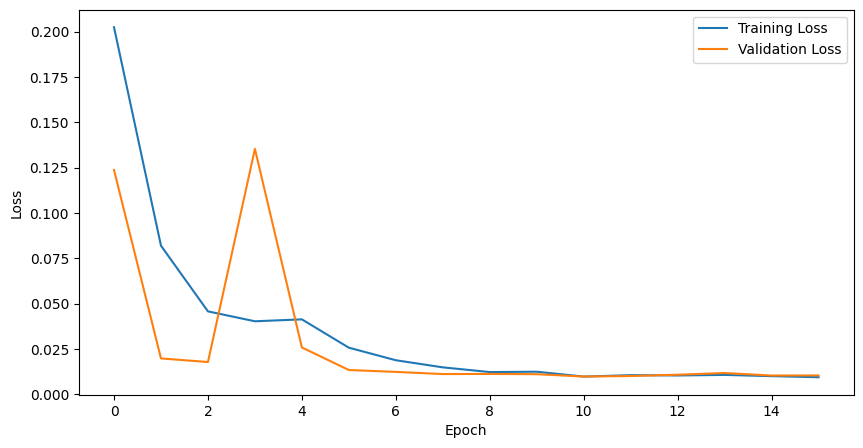

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

seed_value = 42
tf.random.set_seed(seed_value)

# X_train_array is a NumPy array with shape (34, 10) and y_train with shape (34, 13314)

# Reshape X_train_array and X_val_array to be compatible with CNN input
X_train_reshaped = X_train_array.reshape(34, 10, 1)
X_val_reshaped = X_val_array.reshape(10, 10, 1)

# Define the CNN model
model = keras.Sequential([
    layers.Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(10, 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=32, kernel_size=2, activation='relu'),  # Additional Convolutional Layer
    layers.MaxPooling1D(pool_size=2),  # Additional Max Pooling Layer
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),  # Dropout layer with a dropout rate of 0.1
    layers.Dense(1024, activation='relu'),
    layers.Dense(13314)  # 13314 neurons for multi-output regression
])

# Compile the model with Mean Squared Error (MSE) loss for each output
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Stop training when validation loss stops improving
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model's weights from the epoch with the best validation loss
)

# Lists to store training and validation loss
train_loss_history = []
val_loss_history = []

# Train the model with validation data
history = model.fit(
    X_train_reshaped, y_train_array,
    epochs=100,
    batch_size=1,
    validation_data=(X_val_reshaped, y_val_array),  # Pass validation data here
    callbacks=[
        keras.callbacks.LambdaCallback(
            on_epoch_end=lambda epoch, logs: (
                train_loss_history.append(logs['loss']),
                val_loss_history.append(logs['val_loss'])
            )
        ),
        early_stopping  # Add early stopping callback
    ]
)

# Make predictions on the test set
X_test_reshaped = X_test_array.reshape(5, 10, 1)
test_predictions = model.predict(X_test_reshaped)

# Calculate R-squared (R2) and root mean squared error (RMSE)
r2 = r2_score(y_test_array, test_predictions)
rmse = np.sqrt(mean_squared_error(y_test_array, test_predictions))

print(f"R-squared (R2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# save the results
np.savetxt('y_test_array.csv',y_test_array.transpose(),delimiter=',')
np.savetxt('test_predictions.csv',test_predictions.transpose(),delimiter=',')

### With feature selection using LightGBM (only most important features are used)

Epoch 1/100
34/34 [==============================] - 2s 17ms/step - loss: 0.0931 - val_loss: 0.0168
Epoch 2/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0179 - val_loss: 0.0153
Epoch 3/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0157 - val_loss: 0.0151
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0169 - val_loss: 0.0161
Epoch 5/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0121 - val_loss: 0.0121
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0143 - val_loss: 0.0149
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0115 - val_loss: 0.0141
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0132 - val_loss: 0.0135
Epoch 9/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0111 - val_loss: 0.0112
Epoch 10/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0117 - val_loss: 0.0134
Epoch 11

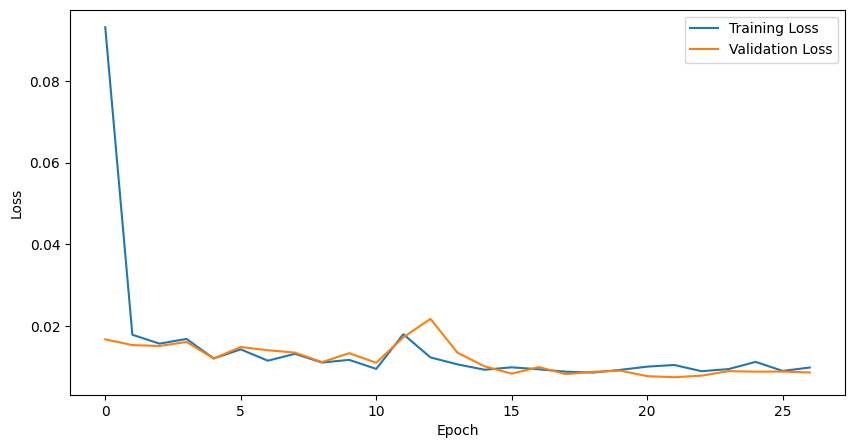

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

seed_value = 42
tf.random.set_seed(seed_value)

# X_train_array is a NumPy array with shape (34, 10) and y_train with shape (34, 13314)

# Reshape X_train_array and X_val_array to be compatible with CNN input
X_train_reshaped = X_train_array[:,[2,6]].reshape(34, 2, 1)
X_val_reshaped = X_val_array[:,[2,6]].reshape(10, 2, 1)

# Define 1D CNN model for multi-output regression
model = keras.Sequential([
    layers.Conv1D(filters=16, kernel_size=1, activation='relu', input_shape=(2, 1)),
    layers.MaxPooling1D(pool_size=1),
    layers.Conv1D(filters=32, kernel_size=1, activation='relu'),  # Additional Convolutional Layer
    layers.MaxPooling1D(pool_size=1),  # Additional Max Pooling Layer
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),  # Dropout layer with a dropout rate of 0.1
    layers.Dense(1024, activation='relu'),
    layers.Dense(13314)  # 13314 neurons for multi-output regression
])

# Compile the model with Mean Squared Error (MSE) loss for each output
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Stop training when validation loss stops improving
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model's weights from the epoch with the best validation loss
)

# Lists to store training and validation loss
train_loss_history = []
val_loss_history = []

# Train the model with validation data
history = model.fit(
    X_train_reshaped, y_train_array,
    epochs=100,
    batch_size=1,
    validation_data=(X_val_reshaped, y_val_array),  # Pass validation data here
    callbacks=[
        keras.callbacks.LambdaCallback(
            on_epoch_end=lambda epoch, logs: (
                train_loss_history.append(logs['loss']),
                val_loss_history.append(logs['val_loss'])
            )
        ),
        early_stopping  # Add early stopping callback
    ]
)

# Make predictions on the test set
X_test_reshaped = X_test_array[:,[2,6]].reshape(5, 2, 1)
test_predictions2 = model.predict(X_test_reshaped)

# Calculate R-squared (R2) and root mean squared error (RMSE)
r2 = r2_score(y_test_array, test_predictions2)
rmse = np.sqrt(mean_squared_error(y_test_array, test_predictions2))

print(f"R-squared (R2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# save the results
np.savetxt('y_test_array.csv',y_test_array.transpose(),delimiter=',')
np.savetxt('test_predictions2.csv',test_predictions2.transpose(),delimiter=',')

### Without considering tide level (only the most important feature related to rainfall)

Epoch 1/15
34/34 [==============================] - 2s 16ms/step - loss: 0.1397 - val_loss: 0.1515
Epoch 2/15
34/34 [==============================] - 0s 10ms/step - loss: 0.0899 - val_loss: 0.1016
Epoch 3/15
34/34 [==============================] - 0s 10ms/step - loss: 0.0721 - val_loss: 0.0721
Epoch 4/15
34/34 [==============================] - 0s 9ms/step - loss: 0.0696 - val_loss: 0.0670
Epoch 5/15
34/34 [==============================] - 0s 9ms/step - loss: 0.0593 - val_loss: 0.0560
Epoch 6/15
34/34 [==============================] - 0s 9ms/step - loss: 0.0547 - val_loss: 0.0466
Epoch 7/15
34/34 [==============================] - 0s 7ms/step - loss: 0.0605 - val_loss: 0.0493
Epoch 8/15
34/34 [==============================] - 0s 9ms/step - loss: 0.0555 - val_loss: 0.0438
Epoch 9/15
34/34 [==============================] - 0s 9ms/step - loss: 0.0611 - val_loss: 0.0414
Epoch 10/15
34/34 [==============================] - 0s 9ms/step - loss: 0.0588 - val_loss: 0.0410
Epoch 11/15
34/3

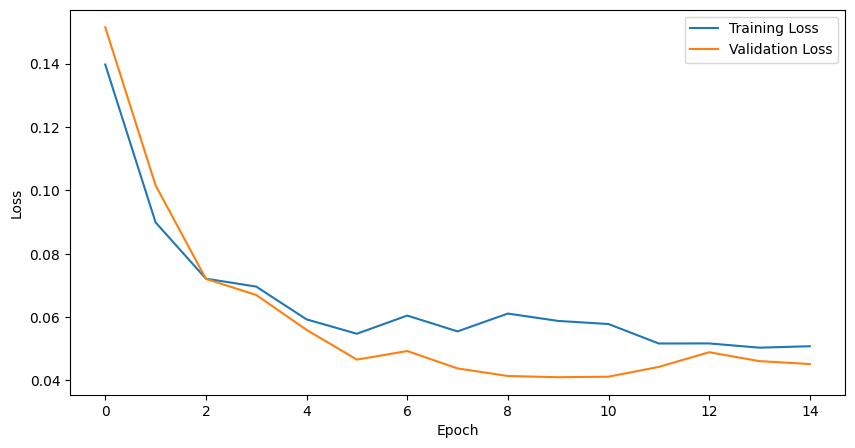

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# X_train_array is a NumPy array with shape (34, 10) and y_train with shape (34, 13314)

# Reshape X_train_array and X_val_array to be compatible with CNN input
X_train_reshaped = X_train_array[:,[2]].reshape(34, 1, 1)
X_val_reshaped = X_val_array[:,[2]].reshape(10, 1, 1)

# Define 1D CNN model for multi-output regression
model = keras.Sequential([
    layers.Conv1D(filters=16, kernel_size=1, activation='relu', input_shape=(1, 1)),
    layers.MaxPooling1D(pool_size=1),
    layers.Conv1D(filters=32, kernel_size=1, activation='relu'),  # Additional Convolutional Layer
    layers.MaxPooling1D(pool_size=1),  # Additional Max Pooling Layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),  # Dropout layer with a dropout rate of 0.1
    layers.Dense(1024, activation='relu'),
    layers.Dense(13314)  # 13314 neurons for multi-output regression
])

# Compile the model with Mean Squared Error (MSE) loss for each output
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Stop training when validation loss stops improving
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model's weights from the epoch with the best validation loss
)

# Lists to store training and validation loss
train_loss_history = []
val_loss_history = []

# Train the model with validation data
history = model.fit(
    X_train_reshaped, y_train_array,
    epochs=15,
    batch_size=1,
    validation_data=(X_val_reshaped, y_val_array),  # Pass validation data here
    callbacks=[
        keras.callbacks.LambdaCallback(
            on_epoch_end=lambda epoch, logs: (
                train_loss_history.append(logs['loss']),
                val_loss_history.append(logs['val_loss'])
            )
        ),
        early_stopping  # Add early stopping callback
    ]
)

# Make predictions on the test set
X_test_reshaped = X_test_array[:,[2]].reshape(5, 1, 1)
test_predictions3 = model.predict(X_test_reshaped)

# Calculate R-squared (R2) and root mean squared error (RMSE)
r2 = r2_score(y_test_array, test_predictions3)
rmse = np.sqrt(mean_squared_error(y_test_array, test_predictions3))

print(f"R-squared (R2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# save the results
np.savetxt('y_test_array.csv',y_test_array.transpose(),delimiter=',')
np.savetxt('test_predictions3.csv',test_predictions3.transpose(),delimiter=',')

## Building the LightGBM model

In [ ]:
evals_result = {}
gbm = lgb.LGBMRegressor(learning_rate=0.04,
                        n_estimators=500,
                        n_jobs=4)
gbm.fit(X_train,y_train,
        categorical_feature=['Point'],
        eval_set=[(X_val,y_val)],
        eval_metric=['rmse','l1'],
        callbacks=[lgb.early_stopping(5), lgb.record_evaluation(evals_result)])

## Plot the feature importance

In [ ]:
def render_plot_importance(importance_type, max_features=10,
                           ignore_zero=True, precision=3):
    ax = lgb.plot_importance(gbm, importance_type=importance_type,
                             max_num_features=max_features,
                             ignore_zero=ignore_zero, figsize=(12, 8),
                             precision=precision)
    plt.show()

if INTERACTIVE:
    # create widget for interactive feature importance plot
    interact(render_plot_importance,
             importance_type=['split', 'gain'],
             max_features=(1, X_train.shape[-1]),
             precision=(0, 10))
else:
    render_plot_importance(importance_type='split')

interactive(children=(Dropdown(description='importance_type', options=('split', 'gain'), value='split'), IntSl…